In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'D:\PHBS\MLF\hw1\cs-training.csv',index_col=0)
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
train = train.fillna(train.mean())
train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [5]:
y_train = train.iloc[:,0].values
X_train = train.iloc[:,1:].values
X_train

array([[ 0.76612661, 45.        ,  2.        , ...,  6.        ,
         0.        ,  2.        ],
       [ 0.95715102, 40.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65818014, 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.24604392, 58.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , 30.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85028295, 64.        ,  0.        , ...,  2.        ,
         0.        ,  0.        ]])

In [6]:
# test data
test = pd.read_csv(r'D:\PHBS\MLF\hw1\cs-test.csv',index_col=0)
y_test = pd.read_csv(r'D:\PHBS\MLF\hw1\sampleEntry.csv',index_col=0)
y_test = y_test['Probability'].values
threshold = 0.5
y_test = np.where(y_test >= threshold, 1, 0)
y_test = pd.DataFrame(y_test).iloc[:,0]
X_test = test.iloc[:,1:]
X_test = X_test.fillna(train.mean()).values
X_test

array([[8.85519080e-01, 4.30000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.63295269e-01, 5.70000000e+01, 0.00000000e+00, ...,
        4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [4.32750360e-02, 5.90000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       ...,
       [8.15963730e-02, 7.00000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.57222268e-01],
       [3.35456547e-01, 5.60000000e+01, 0.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       [4.41841663e-01, 2.90000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# PCA

In [7]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.29948872, 0.1533157 , 0.12254696, 0.10092078, 0.10010863,
       0.09344974, 0.073465  , 0.05430268, 0.00172094, 0.00068085])

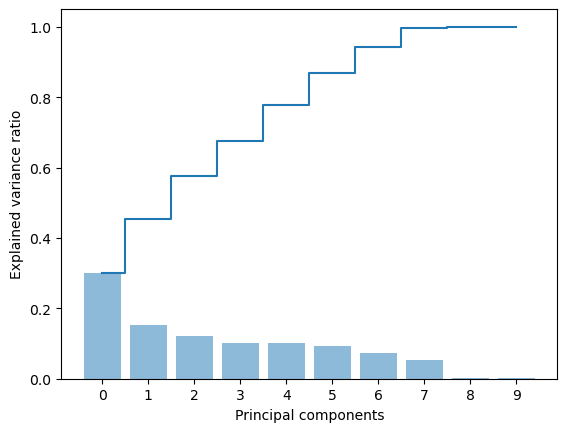

In [9]:
import matplotlib.pyplot as plt

plt.bar(range(10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(10))
plt.show()

In [10]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Combining transformers and estimators in a pipeline

# Logistic Regression

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [12]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(random_state=1, solver='lbfgs'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.984


# Apply 5-fold cross-validation.

In [13]:
from sklearn.model_selection import StratifiedKFold
    
#Apply 5-fold cross-validation
kfold = StratifiedKFold(n_splits=5).split(X_train, y_train) 


scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [111980   8020], Acc: 0.933
Fold:  2, Class dist.: [111979   8021], Acc: 0.933
Fold:  3, Class dist.: [111979   8021], Acc: 0.933
Fold:  4, Class dist.: [111979   8021], Acc: 0.934
Fold:  5, Class dist.: [111979   8021], Acc: 0.933

CV accuracy: 0.933 +/- 0.000


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93333333 0.93293333 0.933      0.93306667 0.9332     0.93333333
 0.9336     0.93366667 0.93326667 0.93373333]
CV accuracy: 0.933 +/- 0.000


# Tuning hyperparameters via grid search

In [15]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = {'logisticregression__C': param_range}

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9333266666666666
{'logisticregression__C': 0.0001}


In [16]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.984
